In [6]:
import numpy as np
import pandas as pd

In [18]:
# 계단 함수 구현하기 #실수 값일때
def step_function1(x):
    if x > 0:
        return 1
    else:
        return 0

In [19]:
x = np.array([-1.0, 1.0, 2.0])

step_function1(x) #넘파이 배열은 불린인덱싱을 반환하니 실수값일때는 안된다.

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [14]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [16]:
x = np.array([1.0, 1.0, 2.0])
y = x > 0
y #이렇게 불린으로 반환 근데 실수여도 똑같은 거 아닌가

array([ True,  True,  True])

In [17]:
xx = 1
y = xx > 0
y #뭐야 똑같은데 근데 그럴수 밖에 없음

True

In [20]:
xx = [1, 2, 3] #그렇다면 리스트일때는 어떨까
step_function1(xx) #안되네

TypeError: '>' not supported between instances of 'list' and 'int'

In [22]:
x = np.array([-1.0, 1.0, 2.0])

step_function(x) #넘파이 이용하여 계단함수 구현

C:\Users\user\AppData\Local\Temp\ipykernel_10088\821751868.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return y.astype(np.int)


array([0, 1, 1])

C:\Users\user\AppData\Local\Temp\ipykernel_10088\821751868.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return y.astype(np.int)


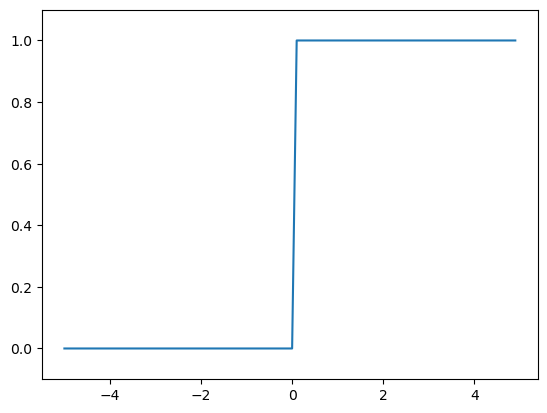

In [28]:
#시각화
import matplotlib.pyplot as plt

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x) #이렇게 함수의 인자를 y에 담아서 시각화를 시켜도 되구나

plt.plot(x, y)
plt.ylim(-0.1, 1.1) #y값 범위 설정
plt.show()

In [29]:
#활성화 함수 구현 시그모이드
def sigmoid(x):
    y=1/(1+np.exp(-x))
    
    return y

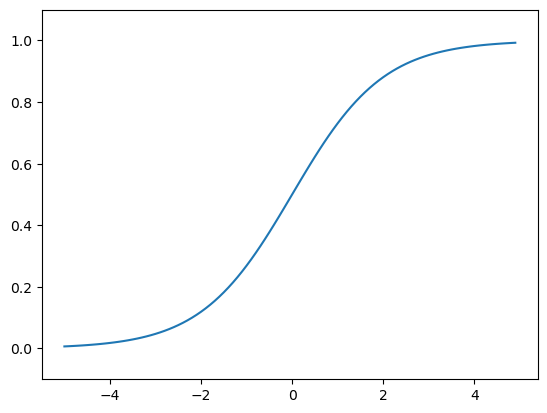

In [31]:
#시각화
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x) #이렇게 함수의 인자를 y에 담아서 시각화를 시켜도 되구나

plt.plot(x, y)
plt.ylim(-0.1, 1.1) #y값 범위 설정
plt.show() #재밌다.

In [32]:
#ReLU함수
def relu(x):
    return np.maximum(0, x)

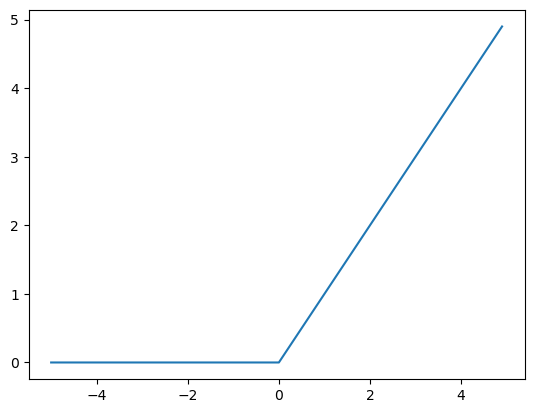

In [34]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x) #이렇게 함수의 인자를 y에 담아서 시각화를 시켜도 되구나

plt.plot(x, y)
plt.show() #재밌다.

In [7]:
def identity_function(x): #항등함수 정의 후에 소프트 맥스 함수로 바꿀거임
    return x

def init_network():
    network = {} #딕셔너리 형태로 담겠다
    network['W1'] = np.array([[0.1, 0.3, 0.5],
                             [0.2, 0.4, 0.6]]) #0층의 가중치들
    network['b1'] = np.array([0.1, 0.2, 0.3]) #0층의 편향들
    network['W2'] = np.array([[0.1, 0.4],
                             [0.2, 0.5],
                             [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3],
                             [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

In [9]:
init_network() #key, value로 구분함

{'W1': array([[0.1, 0.3, 0.5],
        [0.2, 0.4, 0.6]]),
 'b1': array([0.1, 0.2, 0.3]),
 'W2': array([[0.1, 0.4],
        [0.2, 0.5],
        [0.3, 0.6]]),
 'b2': array([0.1, 0.2]),
 'W3': array([[0.1, 0.3],
        [0.2, 0.4]]),
 'b3': array([0.1, 0.2])}

In [10]:
#패스 흐름 만드는 함수
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3'] #value들을 새로운 객체에 할당
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
     
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

In [5]:
network = init_network()

x= np.array([1.0, 0.5])
y= forward(network, x)
print(y)

[0.31682708 0.69627909]
